NameError: name 'imbalance_df' is not defined

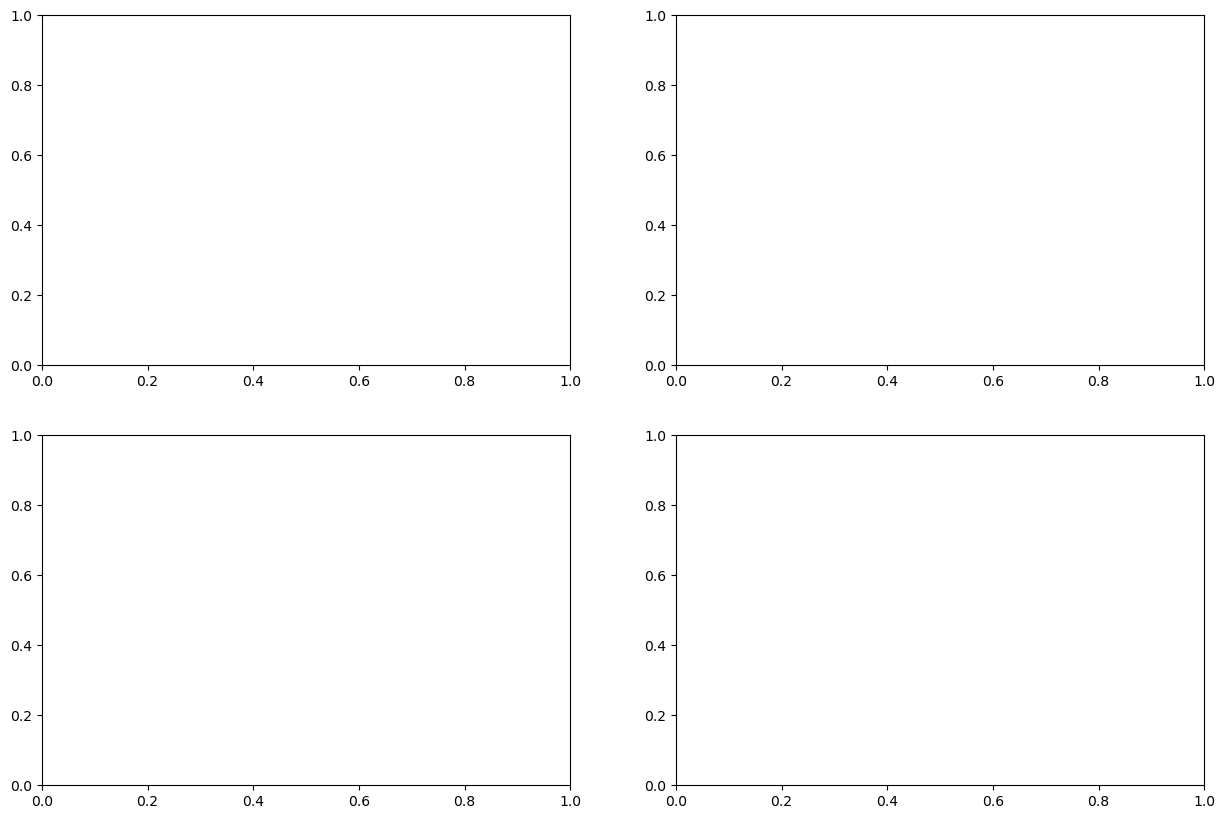

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

CSV_FILE = "fidelity_orderbook_clean.csv"
PLOT_REFRESH = 2000  # milliseconds between chart updates
MAX_POINTS = 5000

def get_imbalance_df():
    # Import imbalance_df from live global module or read from pickle
    # Example: from imbalance_monitor import imbalance_df
    # return imbalance_df.copy()
    
    # Or if saved periodically from your monitor script:
    if os.path.exists("imbalance_live.pkl"):
        df = pd.read_pickle("imbalance_live.pkl")
        df = df.tail(MAX_POINTS)
        df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
        return df
    return pd.DataFrame()

# Set up dynamic charts
fig, axes = plt.subplots(5, 1, figsize=(12, 10), sharex=True)
titles = [
    "Bid / Ask Prices",
    "Depth Imbalance",
    "Bid Flow",
    "Ask Flow",
    "Ask/Bid Walk Ratio"
]

for ax, title in zip(axes, titles):
    ax.set_title(title, fontsize=10)
    ax.grid(True)

plt.tight_layout()

def animate(i):
    df = get_imbalance_df()
    if df.empty or 'timestamp' not in df.columns:
        return

    ts = df['timestamp']
    axes[0].clear()
    axes[0].plot(ts, df['bid_price'], label="Bid", color='green')
    axes[0].plot(ts, df['ask_price'], label="Ask", color='red')
    axes[0].legend(loc="upper right")

    axes[1].clear()
    axes[1].plot(ts, df['depth_imbalance'], color='purple')

    axes[2].clear()
    axes[2].plot(ts, df['flow_bid'], color='blue')

    axes[3].clear()
    axes[3].plot(ts, df['flow_ask'], color='orange')

    axes[4].clear()
    axes[4].plot(ts, df['ask_bid_walk'], color='black')

    for ax, title in zip(axes, titles):
        ax.set_title(title, fontsize=9)
        ax.grid(True)

ani = animation.FuncAnimation(fig, animate, interval=PLOT_REFRESH)
plt.show()
